In [15]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import math
from statsmodels.stats.multitest import multipletests
from scipy.stats import wilcoxon
import matplotlib as mpl

stim = np.array([3,1,2,3,2,1,3,1,2,1,2,3,1,2,3,2,3,1,3,2,1,2,3,1,2,3,1,2,1,3,2,3,1,2,3,1,3,1,2,3,1,2,3,2,1,2,1,3,2,1,3,1,2,3,1,2,3,2,1,3,1,2,3,2,1,3,1,3,2,3,2,1,3,2,1,3,1,2,3,2,1,3,1,2,3,2,1,2,3,1,
                 3,1,2,3,1,2,3,2,1,2,3,1,2,1,3,2,1,3,1,3,2,3,1,2,1,2,3,2,3,1,2,3,1,3,2,1,2,3,1,2,1,3,1,2,3,2,3,1,2,1,3,1,3,2,3,1,2,1,2,3,2,1,3,1,2,3,2,3,1,3,1,2,1,3,2,1,3,2,3,1,2,3,2,1,2,1,3,1,2,3])
c = ['b','g','m']
the_color = ['teal','tomato','darkgoldenrod']
if_p_corr = True
if_save = True

In [16]:
def func(x,a,b):
    return a*x+b

def calculate_angle(vec1, vec2):
    # Compute the dot product
    dot_product = np.dot(vec1, vec2)
    # Compute the magnitudes of the vectors
    magnitude_vec1 = np.linalg.norm(vec1)
    magnitude_vec2 = np.linalg.norm(vec2)
    # Compute the cosine of the angle
    cos_angle = dot_product / (magnitude_vec1 * magnitude_vec2)
    # Compute the angle in radians
    angle_radians = np.arccos(cos_angle)
    # Convert the angle to degrees
    angle_degrees = np.degrees(angle_radians)
    return angle_degrees

def compute_angles(data_mean):
    angles = np.zeros((np.size(data_mean,0),np.size(data_mean,1),np.size(data_mean,3)))
    for i in range(np.size(data_mean,0)):
        for j in range(np.size(data_mean,1)):
            plt.figure()
            y_list = []
            for k in range(np.size(data_mean,3)):
                data = np.squeeze(data_mean[i,j,:,k,:])
                popt, pcov = curve_fit(func, np.squeeze(data[:,0]), np.squeeze(data[:,1]))
                plt.scatter(np.squeeze(data[:,0]), np.squeeze(data[:,1]),color = c[k])
                plt.plot(np.squeeze(data[:,0]), func(np.squeeze(data[:,0]), *popt),color = c[k])
                y_list.append(func(np.squeeze(data[:,0]), *popt))
            plt.show()
            kk=0
            y_list = np.array(y_list)
            print(np.shape(y_list))
            for k1 in range(np.size(data_mean,3)-1):
                a1 = np.squeeze(data_mean[i,j,:,k1,0])
                b1 = np.squeeze(y_list[k1,:])
                vec1 = np.array([a1[10],b1[10]])-np.array([a1[3],b1[3]])
                for k2 in range(k1+1,np.size(data_mean,3)):
                    a2 = np.squeeze(data_mean[i,j,:,k2,0])
                    b2 = np.squeeze(y_list[k2,:])
                    vec2 = np.array([a2[10],b2[10]])-np.array([a2[3],b2[3]])
                    angles[i,j,kk] = calculate_angle(vec1,vec2)
                    kk = kk+1
            print(angles[i,j,:])
    return angles


In [17]:
data_path = '../results/nsyb-G7f-rAch1h/figures-for-revision1/check_denoise'
subfile_path = ['srd','nodenoise','check-denoise']
filename = 'data_merge_test.npy'

(2, 3, 43, 180, 2)


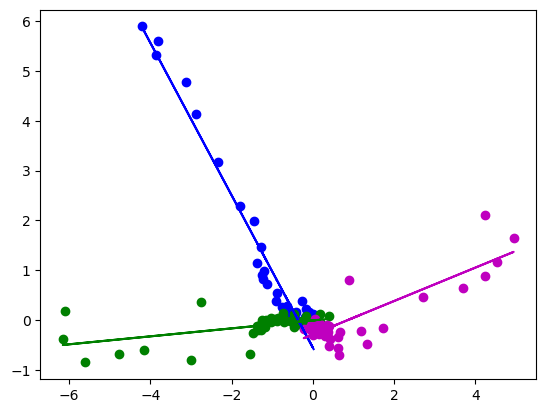

(3, 43)
[ 61.37767495 104.67243438 166.05010934]


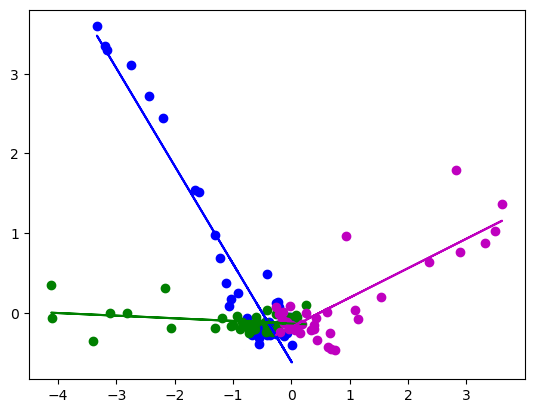

(3, 43)
[ 48.95466401 108.85012556 157.80478957]


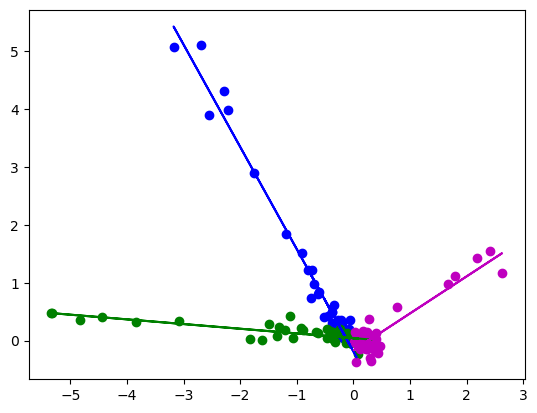

(3, 43)
[ 55.88911085  86.83442319 142.72353403]


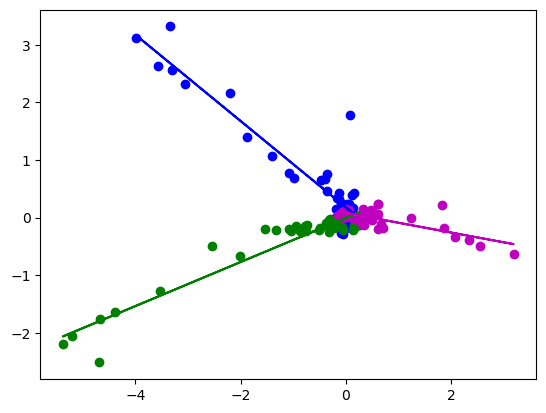

(3, 43)
[ 57.78466344 152.78455008 149.43078648]


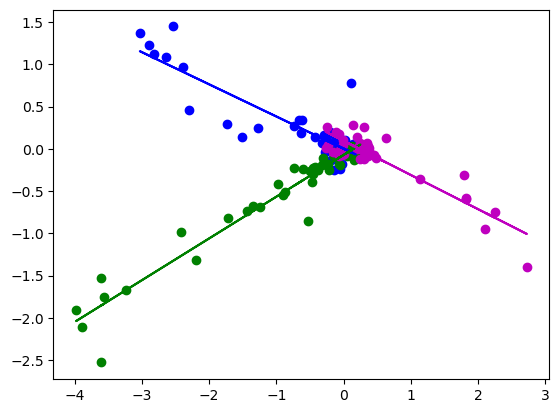

(3, 43)
[ 47.15810622 178.8227537  131.66464748]


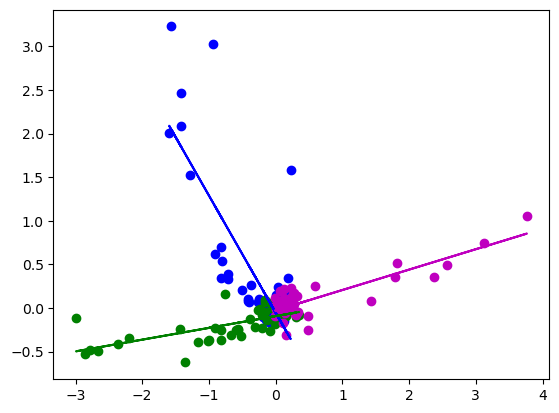

(3, 43)
[ 60.98754479 113.52161386 174.50915864]
(2, 3, 43, 180, 2)


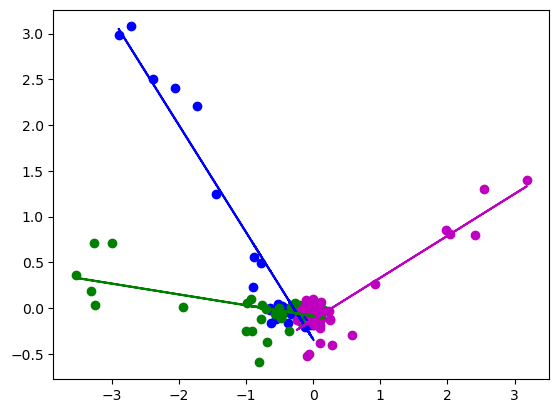

(3, 43)
[ 42.7464631  105.90600475 148.65246786]


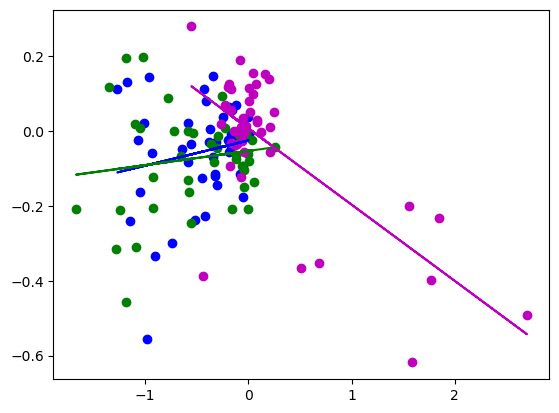

(3, 43)
[  1.66075482 164.64997544 166.31073026]


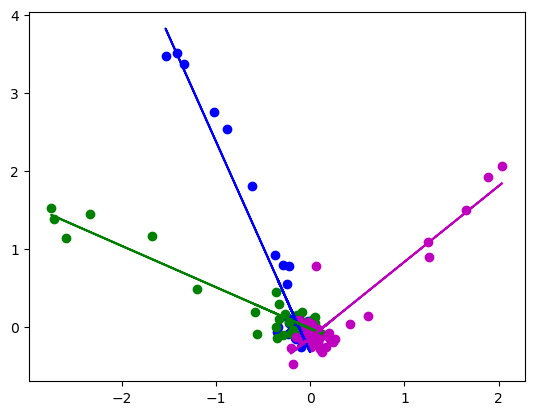

(3, 43)
[ 41.78474455  66.11364819 107.89839274]


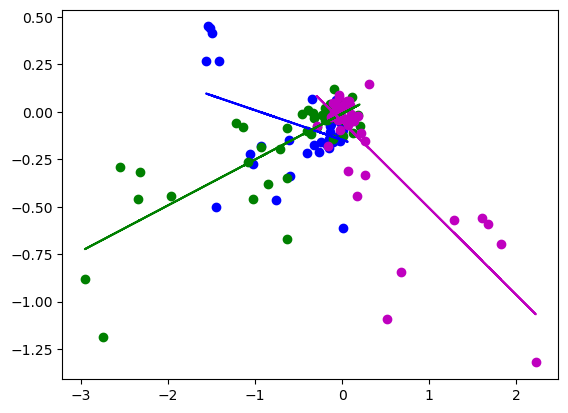

(3, 43)
[ 22.46898524 164.30774881 141.83876357]


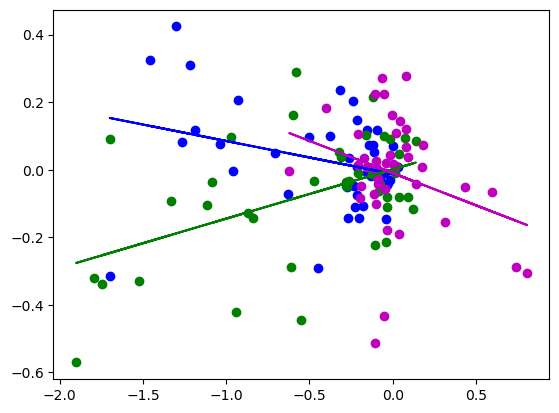

(3, 43)
[ 13.86454897 174.77734289 160.91279392]


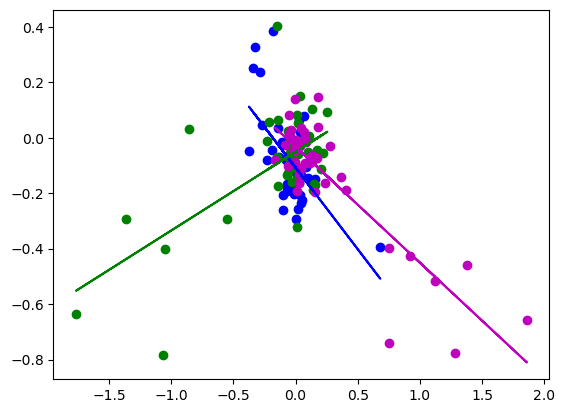

(3, 43)
[ 46.26920199 172.2500796  141.48071841]
(2, 3, 43, 180, 2)


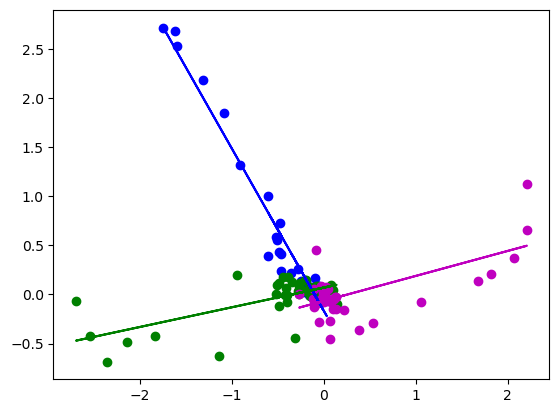

(3, 43)
[ 70.20083026 106.8587259  177.05955616]


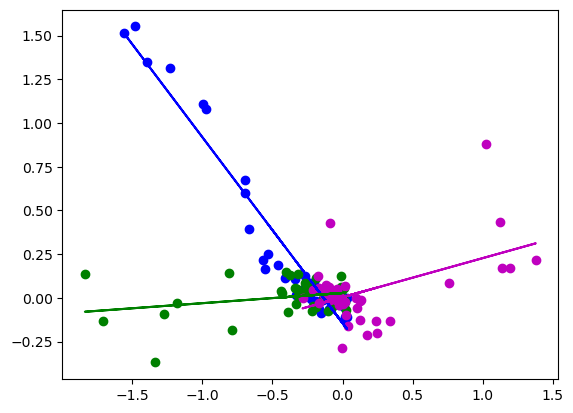

(3, 43)
[ 50.09545005 120.63924982 170.73469987]


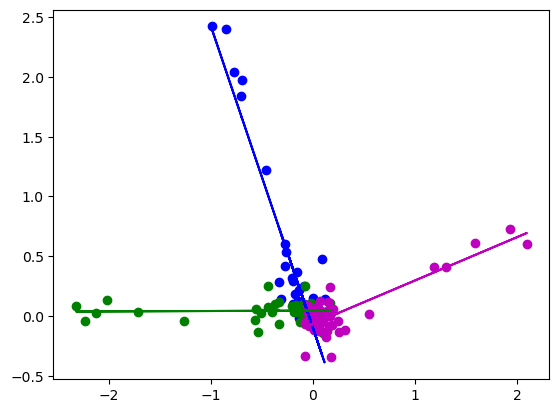

(3, 43)
[ 68.60343316  91.64891177 160.25234493]


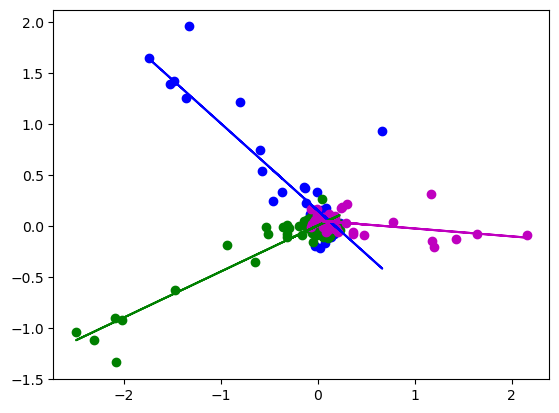

(3, 43)
[ 64.75638172 143.90862015 151.33499813]


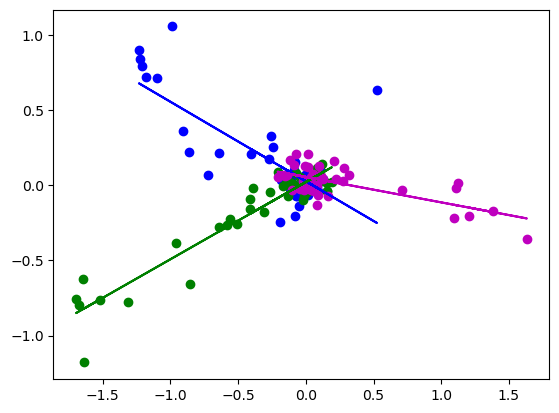

(3, 43)
[ 55.04547486 161.7356927  143.21883244]


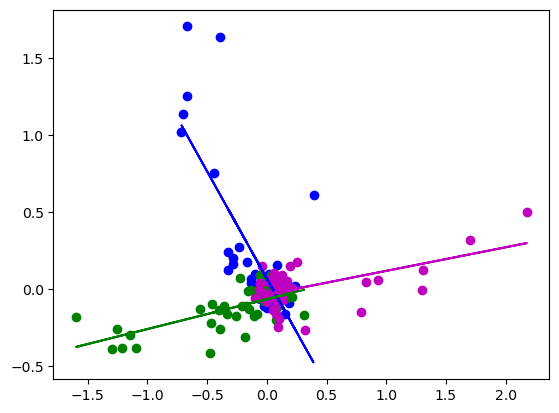

(3, 43)
[ 65.29222612 116.98447247 177.72330141]


In [18]:
for i in range(len(subfile_path)):
    data = np.load(data_path+'/'+subfile_path[i]+'/'+filename)
    print(np.shape(data))
    data_mean = np.zeros((np.size(data,0),np.size(data,1),np.size(data,2),len(np.unique(stim)),np.size(data,4)))
    for k in range(len(np.unique(stim))):
        data_mean[:,:,:,k,:] = np.mean(data[:,:,:,stim==k+1,:],3)
    angles = compute_angles(data_mean)
    np.save(data_path+'/'+subfile_path[i]+'/'+'angles.npy',angles)

[0.046875 0.046875 0.15625 ]
[0.046875 0.046875 0.84375 ]
[0.046875 0.046875 0.09375 ]


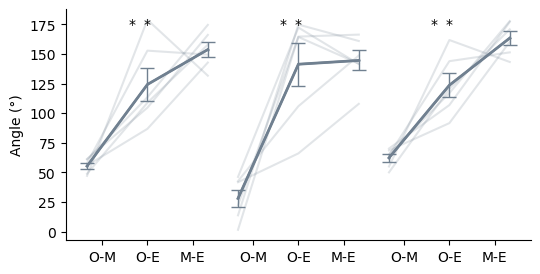

In [21]:
angle_list = []
for i in range(len(subfile_path)):
    angles = np.load(data_path+'/'+subfile_path[i]+'/'+'angles.npy')
    angles = angles.reshape((-1,np.size(angles,2)))
    angle_list.append(angles)
angle_list = np.array(angle_list)
plt.figure(figsize = (6,3))
ax = plt.axes()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for i in range(np.size(angle_list,0)):
    a = np.squeeze(angle_list[i,:,:])
    the_mean = np.mean(a,0)
    the_std = np.std(a,0,ddof = 1)/math.sqrt(np.size(a,0))
    plt.errorbar([i-0.4,i,i+0.4],the_mean,yerr=the_std,ecolor='slategray',elinewidth=1,marker='.',mfc='slategray',\
    mec='slategray',mew=1,ms=1,alpha=1,capsize=5,capthick=3,color='slategray', linewidth=2)
    plt.plot([i-0.4,i,i+0.4],the_mean,color = 'slategray')
    for j in range(np.size(a,0)):
        plt.plot([i-0.4,i,i+0.4],np.squeeze(a[j,:]),color = 'slategray',alpha = 0.2)
    p_list = []
    for ii in range(np.size(a,1)-1):
        for jj in range(ii+1,np.size(a,1)):
            aa = a[:,ii]
            bb = a[:,jj]
            res = wilcoxon(aa,bb)
            p = res.pvalue
            p_list.append(p)
    if if_p_corr:
        p_corrected = multipletests(p_list,method = 'fdr_bh')
        p_list = p_corrected[1]
    for ii in range(len(p_list)):
        p = p_list[ii]
        if p<0.05 and p>=0.01:
            plt.text(i+(ii-1)*0.1,175,'*',verticalalignment = 'center', horizontalalignment = 'center')
        elif p<0.01 and p>0.001:
            plt.text(i+(ii-1)*0.1,175,'**',verticalalignment = 'center', horizontalalignment = 'center')
        elif p<0.001 and p>=0.0001:
            plt.text(i+(ii-1)*0.1,175,'***',verticalalignment = 'center', horizontalalignment = 'center') 
        elif p<0.0001:
            plt.text(i+(ii-1)*0.1,175,'****',verticalalignment = 'center', horizontalalignment = 'center') 
    print(p_list)
plt.xticks([0-0.3,0,0+0.3,1-0.3,1,1+0.3,2-0.3,2,2+0.3],['O-M','O-E','M-E','O-M','O-E','M-E','O-M','O-E','M-E'])
plt.ylabel('Angle (°)')
if if_save:
    mpl.rcParams['pdf.fonttype'] = 42
    mpl.rcParams['ps.fonttype'] = 42
    plt.savefig(data_path+'/angles.pdf',bbox_inches = 'tight')
    plt.savefig(data_path+'/angles.png',bbox_inches = 'tight')
plt.show()